In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.10.0'

# Traning and testing sets preparation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 shuffle=False,
                                                 class_mode = 'categorical')

Found 1200 images belonging to 4 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/test', 
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 396 images belonging to 4 classes.


# Model creation

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

In [7]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

# The training process

In [14]:
hist=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
38/38 [==============================] - 33s 834ms/step - loss: 5.1469 - accuracy: 0.2025 - val_loss: 1.3850 - val_accuracy: 0.2854
Epoch 2/20
38/38 [==============================] - 31s 820ms/step - loss: 1.3944 - accuracy: 0.1600 - val_loss: 1.3805 - val_accuracy: 0.2854
Epoch 3/20
38/38 [==============================] - 31s 825ms/step - loss: 1.3872 - accuracy: 0.3175 - val_loss: 1.3633 - val_accuracy: 0.2551
Epoch 4/20
38/38 [==============================] - 31s 813ms/step - loss: 1.3810 - accuracy: 0.3367 - val_loss: 2.9098 - val_accuracy: 0.2500
Epoch 5/20
38/38 [==============================] - 31s 818ms/step - loss: 1.5898 - accuracy: 0.2242 - val_loss: 1.3855 - val_accuracy: 0.2500
Epoch 6/20
38/38 [==============================] - 31s 819ms/step - loss: 1.4067 - accuracy: 0.3250 - val_loss: 1.3762 - val_accuracy: 0.2500
Epoch 7/20
38/38 [==============================] - 31s 825ms/step - loss: 1.4042 - accuracy: 0.2142 - val_loss: 1.3631 - val_accuracy: 0.4899

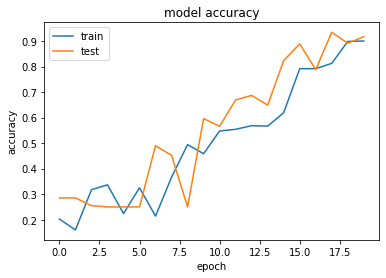

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model_accuracy.jpg',dpi=500)
plt.show()

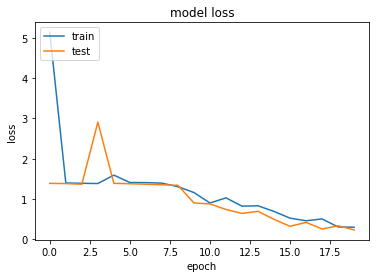

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model_loss.jpg',dpi=500)
plt.show()

# Image prediction

In [17]:
import keras.utils as image
test_image = image.load_img('data/prediction/green (15).png', target_size = (64, 64))
test_image = image.img_to_array(test_image)

In [18]:
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)

1/1 [==============================] - 0s 127ms/step


In [19]:
result

array([[4.6926452e-06, 9.5370078e-01, 4.0805675e-02, 5.4888935e-03]],
      dtype=float32)

In [20]:
dictionary = {'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}
prediction = np.argmax(result, axis = 1)
prediction = int(prediction)
key_list = list(dictionary.keys())
value_list = list(dictionary.values())
pos = value_list.index(prediction)
print('This bean is', key_list[prediction])

This bean is Green


In [21]:
import cv2
im = cv2.imread('data/prediction/green (15).png', 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, key_list[prediction], (10,60), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('prediction_text.jpg', im)

True

# Confussion matrix

In [27]:
predictions = cnn.predict(test_set)
predictions = np.argmax(predictions, axis = 1)

13/13 [==============================] - 3s 197ms/step


In [28]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0,

In [29]:
results_validation =cnn.evaluate(test_set, batch_size=32)

13/13 [==============================] - 2s 184ms/step - loss: 0.2264 - accuracy: 0.9167


In [30]:
print("test loss, test acc:", results_validation)

test loss, test acc: [0.22643926739692688, 0.9166666865348816]


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(test_set.classes, predictions)

0.9166666666666666

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, predictions)
cm

array([[99,  0,  0,  0],
       [ 0, 97,  2,  0],
       [ 0,  2, 97,  0],
       [28,  1,  0, 70]], dtype=int64)

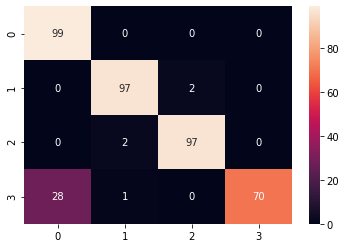

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True);